In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/inputs


/content/drive/MyDrive/inputs


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 78.3 MB/s 


Landmarks detection


[180 238 173 222 176 226 164 202 171 216 170 207 167 187 126 192 165 175
 163 168 156 135 181 240 182 241 183 242 183 243 183 245 184 248 185 251
 187 258 174 224 169 224 102 174 145 193 139 194 133 196 124 195 149 190
 132 184 139 182 127 186 124 188 121 199 167 273 123 191 106 200 114 198
 144 219 172 238 175 243 165 241 161 243 170 244 166 245 157 252 168 223
 165 217 113 185 153 202 153 222 153 218 127 221 164 209 125 178 117 181
 104 164 152 177 145 182 151 248 127 251 159 224 165 225 157 246 160 246
 113 177 154 223 136 176 134 171 122 146 108 170 128 158 109 183 106 179
 174 241 168 243 163 244 161 224 159 246 162 247 161 245 161 223 167 244
 171 243 177 243 179 259 177 252 177 249 176 246 177 244 167 245 166 246
 165 248 164 250 153 239 115 224 175 225 164 245 163 246 168 227 158 226
 166 226 148 206 139 212 153 220 110 154 115 163 121 173 163 255 148 170
 142 154 137 140 128 196 116 205 152 188 118 190 156 197 156 220 111 210
 121 208 128 208 139 205 147 201 152 197 162 189 11

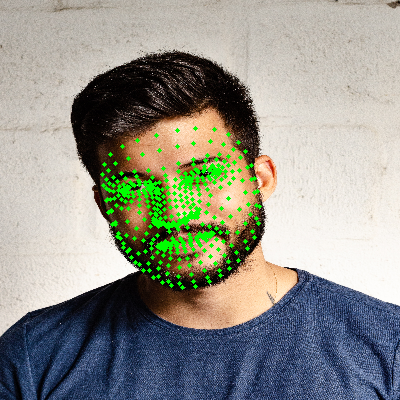

In [ ]:
import cv2 as cv
import mediapipe as mp
import time
from google.colab.patches import cv2_imshow
import numpy as np

# image = cv.imread('/content/drive/MyDrive/inputs/open_eyes/70.jpg')

map_face_mesh = mp.solutions.face_mesh

mesh_coord=[]

def landmarksDetection(img,results,draw=True):
  height,width=img.shape[:2]
  # list[(x1,y1),(x2,y2)]
  mesh_coord=[[int(point.x * width),int(point.y * height)] for point in results.multi_face_landmarks[0].landmark]
  # mesh_coord=[[point.x,point.y,point.z] for point in results.multi_face_landmarks[0].landmark]



  if draw:
    [cv.circle(img,tuple(p[:2]),2,(0,255,0),-1) for p in mesh_coord]
  
  return mesh_coord




with map_face_mesh.FaceMesh(min_detection_confidence=0.5,min_tracking_confidence=0.5) as face_mesh:
  
  image = cv.imread('/content/drive/MyDrive/inputs/Test/A1.jpeg')
  image=cv.resize(image,(400,400))

  bgr_image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
  results=face_mesh.process(bgr_image)
    # print(type(results))

  if results.multi_face_landmarks:
    mesh_cords=landmarksDetection(image,results)
    
    mesh_cords=np.array(mesh_cords)
    mesh_cords=mesh_cords.flatten()
    print(mesh_cords)
    print(len(mesh_cords))

  cv2_imshow(image)
  cv.waitKey(0)


Writing to a CSV file

In [ ]:
import os
import cv2 as cv
import csv
import numpy as np

dirs=['Attentive_train','Bored_train']
with open('dataset2_train.csv','w',encoding='UTF8') as csvfile:
  fieldnames=[]
  fieldnames.append("count")
  for i in range(1,937):
    fieldnames.append(i)
  fieldnames.append("class")
  writer = csv.writer(csvfile)
  writer.writerow(fieldnames)

  with map_face_mesh.FaceMesh(min_detection_confidence=0.5,min_tracking_confidence=0.5) as face_mesh:
    count=0
    for folders in dirs:
    # for image in os.listdir(folders):
      
      images = [img for img in os.listdir(folders) if img.endswith(".jpg")]

      for image_file in images:
        data=[]

        image = cv.imread('/content/drive/MyDrive/inputs/'+folders+'/'+image_file)

        image=cv.resize(image,(400,400))

        bgr_image=cv.cvtColor(image,cv.COLOR_RGB2BGR)
        results=face_mesh.process(bgr_image)

        if results.multi_face_landmarks:
          mesh_cords=landmarksDetection(image,results)
        mesh_cords=np.array(mesh_cords)
        mesh_cords=mesh_cords.flatten()

        if folders=="Attentive_train":
          data=[]
          data.append(count)

          for i in range(len(mesh_cords)):
            data.append(mesh_cords[i])
          data.append(1)

          count=count+1
          writer.writerow(data)
          
        else:
          data=[]
          data.append(count)

          for i in range(len(mesh_cords)):
            data.append(mesh_cords[i])
          data.append(2)

          count=count+1
          writer.writerow(data)
      print(f"Writing {count} row",count)

print("Done Writing...")


Writing 1331 row 1331
Writing 2623 row 2623
Done Writing...


SVM implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/inputs/dataset2_train.csv')
# df.head()
# df.tail()
# df.shape
# df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.size
# df['class'].count()
df['class'].value_counts()
df

,count,1,2,3,4,5,6,7,8,9,...,928,929,930,931,932,933,934,935,936,class
0,0,281,233,290,212,281,217,282,187,292,...,159,283,162,284,164,304,152,306,148,1
1,1,281,237,290,214,281,220,282,189,292,...,161,283,163,284,166,303,153,305,149,1
2,2,281,239,290,217,281,222,282,191,291,...,163,284,166,285,168,306,156,308,151,1
3,3,222,212,226,188,223,196,217,165,226,...,148,232,150,230,151,265,146,268,141,1
4,4,219,205,225,184,220,192,216,161,225,...,145,226,146,225,147,252,143,255,138,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,2618,232,286,234,233,229,250,218,187,235,...,152,247,155,245,157,313,149,320,139,2
2619,2619,207,289,204,235,205,248,182,180,203,...,122,243,129,236,135,358,108,366,98,2
2620,2620,199,339,193,289,197,298,178,224,192,...,155,230,163,225,169,323,145,332,135,2
2621,2621,201,337,204,283,203,294,192,223,205,...,169,243,175,238,180,331,168,340,162,2


Diving dependent and independent classes


In [ ]:
n=len(df)
feature_df=df[0:n]
feature_df.drop(['count', 'class'], axis = 1, inplace = True) 
# Independent variable
X=np.asarray(feature_df)
# np.any(np.isnan(X))
# np.all(np.isfinite(X))
# Dependent variable 
Y=np.asarray(df['class'])
# np.any(np.isnan(Y))
# np.all(np.isfinite(Y))
# X.shape
# feature_df
# Y.shape
# X[0:5]
Y[0:5]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array([1, 1, 1, 1, 1])

Divide into trainig and testing part

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

# X_train.shape
# (275, 468)
# Y_train.shape
# (275,)
# X_test.shape
# (69, 468)
Y_test.shape
# (69,)

(525,)

Modelling - SVM

In [ ]:
from sklearn import svm

# kernels= linear,polynomial,rbf,sigmoid
classifier=svm.SVC(kernel='linear',gamma='auto',C=3)
classifier.fit(X_train,Y_train)
Y_predict=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           1       0.86      0.87      0.87       260
           2       0.87      0.86      0.87       265

    accuracy                           0.87       525
   macro avg       0.87      0.87      0.87       525
weighted avg       0.87      0.87      0.87       525



Modelling - Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=10000000)
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=10000000)

In [ ]:
from sklearn.metrics import classification_report

Y_predict=model.predict(X_test)
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        49
           2       1.00      0.98      0.99        41

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



Saving the model

In [ ]:
import pickle
filename = 'SVM_optimised_model.sav'
pickle.dump(classifier, open(filename, 'wb'))


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print("Accuracy =",result)

Accuracy = 0.8666666666666667


Model Loading and Testing

In [ ]:
import pickle
filename = 'SVM_optimised_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
# Y_predict=loaded_model.predict(X)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y,Y_predict))

              precision    recall  f1-score   support

           1       0.93      0.94      0.93      1331
           2       0.93      0.92      0.93      1292

    accuracy                           0.93      2623
   macro avg       0.93      0.93      0.93      2623
weighted avg       0.93      0.93      0.93      2623



In [ ]:
predict=loaded_model.predict([mesh_cords.tolist()])
print(predict)

[1]
